In [1]:
import pandas as pd

In [2]:
path = '/Users/student/Downloads/'
path = '/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/target_lists/'

targets = pd.read_csv(path+'SRMP_target_list_A_blind_search_Kylor.csv')

In [3]:
targets

,TIC ID,Notes,Planet Radius (Earth Radii),Period (days),Transit Duration (Hours),Signal Detection Efficiency (SDE),Classification,Observed Sectors [String],N Sectors Observed,dist,...,R_star,rho,Tmag,Vmag,Gmag,rmag,imag,Zmag,Hmag,Kmag
0,70597126,NaN,NaN,NaN,NaN,NaN,NaN,Sector 5,1.0,32.4382,...,0.149000,41.28500,14.4249,19.060,15.9690,NaN,NaN,NaN,11.919,11.641
1,36724087,NaN,NaN,NaN,NaN,NaN,NaN,Sector 9,1.0,21.9814,...,0.374139,6.91253,10.5848,13.140,11.8465,NaN,NaN,NaN,8.439,8.204
2,170636897,NaN,NaN,NaN,NaN,NaN,NaN,"Sector 4, Sector 5",2.0,13.3991,...,0.218000,16.37320,11.0692,14.054,12.4685,NaN,NaN,NaN,8.718,8.411
3,156646255,NaN,NaN,NaN,NaN,NaN,NaN,Sector 23,1.0,21.6717,...,0.206000,18.76770,12.3753,16.030,13.8178,14.7940,13.3662,12.0962,9.911,9.647
4,309153361,NaN,NaN,NaN,NaN,NaN,NaN,Sector 11,1.0,30.3645,...,0.200000,11.24980,12.3857,15.377,13.7905,NaN,NaN,NaN,9.992,9.644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,333541955,NaN,NaN,NaN,NaN,NaN,NaN,Sector 3,1.0,32.8024,...,0.206000,15.51850,12.8533,16.050,14.2128,16.1962,30.0000,12.9070,10.585,10.279
458,51024887,NaN,NaN,NaN,NaN,NaN,NaN,Sector 18,1.0,41.5305,...,0.165066,30.20510,14.9885,15.869,16.5406,NaN,NaN,NaN,11.975,11.720
459,219041246,NaN,NaN,NaN,NaN,NaN,NaN,"Sector 16, Sector 22, Sector 23",3.0,40.8668,...,0.292425,10.71740,12.7022,15.355,14.0104,NaN,NaN,NaN,10.467,10.217
460,14722048,NaN,NaN,NaN,NaN,NaN,NaN,Sector 22,1.0,42.1049,...,0.321000,5.58154,11.6476,13.931,12.8430,13.4473,12.2431,11.7087,9.542,9.285


In [4]:
import matplotlib.pyplot as plt

In [5]:
targets.columns

Index(['TIC ID', 'Notes', 'Planet Radius (Earth Radii)', 'Period (days)',
       'Transit Duration (Hours)', 'Signal Detection Efficiency (SDE)',
       'Classification', 'Observed Sectors [String]', 'N Sectors Observed',
       'dist', 'ra', 'dec', 'eclat', 'eclong', 'Teff', 'logg', 'M_star',
       'R_star', 'rho', 'Tmag', 'Vmag', 'Gmag', 'rmag', 'imag', 'Zmag', 'Hmag',
       'Kmag'],
      dtype='object')

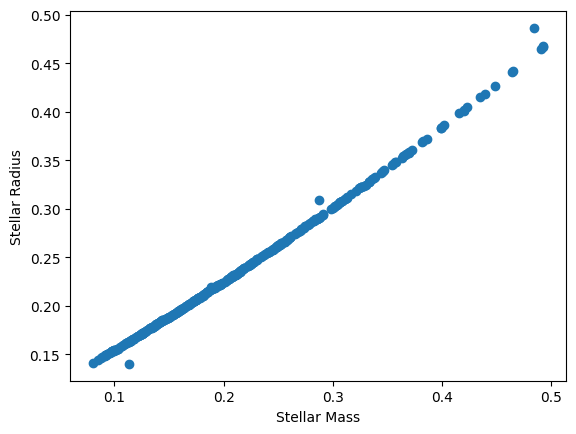

In [6]:
plt.scatter( targets['M_star'], targets['R_star'] )
plt.xlabel('Stellar Mass')
plt.ylabel('Stellar Radius')
plt.show()

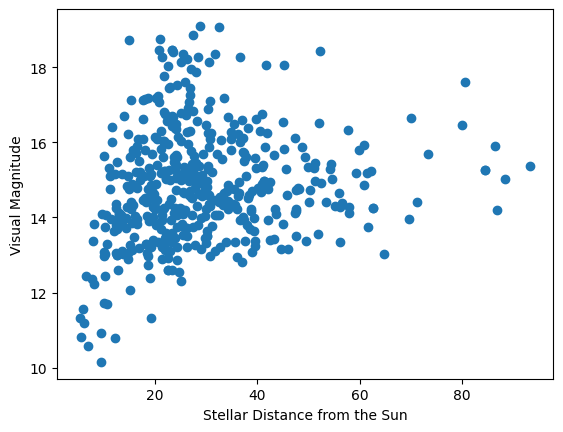

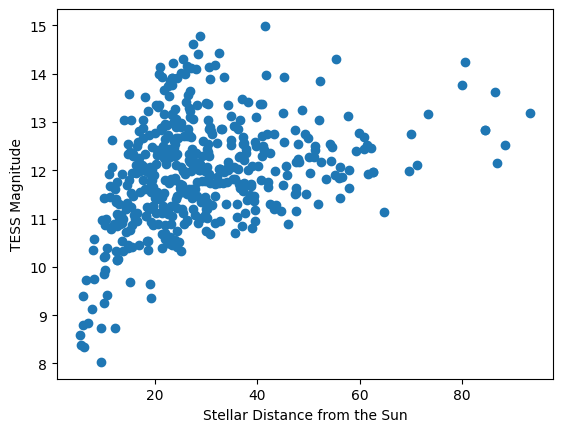

In [7]:
plt.scatter( targets['dist'], targets['Vmag'] )
plt.xlabel('Stellar Distance from the Sun')
plt.ylabel('Visual Magnitude')
plt.show()

plt.scatter( targets['dist'], targets['Tmag'] )
plt.xlabel('Stellar Distance from the Sun')
plt.ylabel('TESS Magnitude')
plt.show()

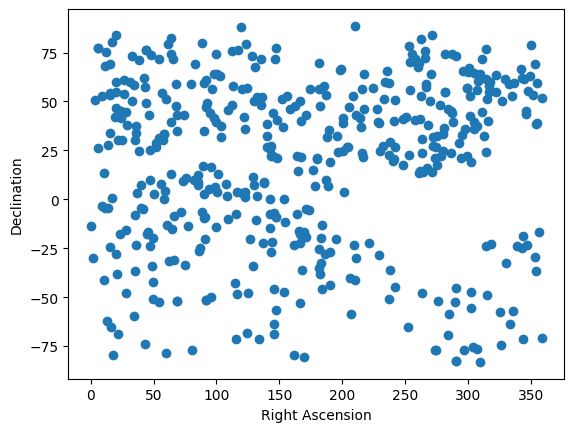

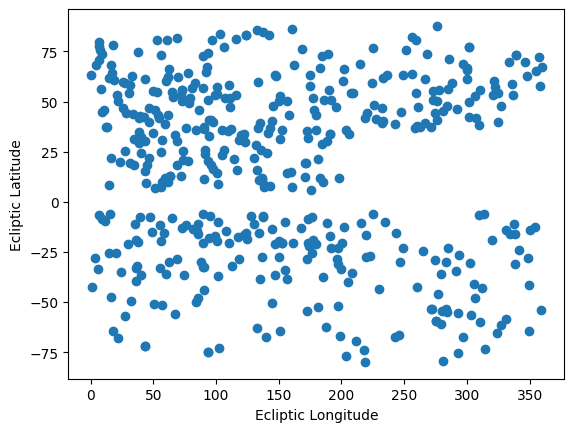

In [8]:
plt.scatter( targets['ra'], targets['dec'] )
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.show()

plt.scatter( targets['eclong'], targets['eclat'] )
plt.xlabel('Ecliptic Longitude')
plt.ylabel('Ecliptic Latitude')
plt.show()

# Now that we have looked our targets in a few parameter spaces: size, brightness, spatial coordinates,
## (Are there more that might be interesting to look into?)

# We can construct a for loop that will perform transit searches with our pipeline on each target star in our list

In [9]:
# pipeline settings

# if you want to run search straight from code keep lines below uncommented, otherwise comment below as noted

# comment this below if you don't want result from code
path= '/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/'
import os,sys
sys.path.append(path)
from lightcurve_practice_code import pipeline,phasefold_version2
# comment this above if you don't want result from code

author='SPOC'
save_directory=os.getcwd()+'/SRMP_Research/'

if os.path.exists(save_directory)==False:
    os.mkdir(save_directory)
else:
    print(save_directory,'exists!')

Sector=None #use all sectors available

#selecting photometry settings
mask_threshold=5
nsigma=2

#selecting smoothing settings
window_size_in_days=None
filter_type='biweight'

#selecting period range to search over
min_period=0.5
max_period=27*2/3


#selection duration range to search over
oversampling_factor=9
duration_grid_step=1.05


#debugging mode
verbose=True


/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/SRMP_Research/ exists!


file  0 :  TIC 70597126
Number of data products for  TIC 70597126  in  TESS  with " 2 minute " cadence and in Sector " None ": 4
Our code is currently coded to handle TESS Sectors 1-26.  ['TESS Sector 31'] light curves are not yet available.
 
processing 1 data products:
['TESS Sector 05']
 
window size (days):  0.2723375511104819
0
recalculated max period based on period grid and input light curve: 8.497544399013345
BLS period is  6.912426789889314 d
BLS reference time is 1442.0925400312121
BLS duration is 0.05556087138765381 d

<class 'lightkurve.lightcurve.LightCurve'>


/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/lightcurve_practice_code.py:1003: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1)


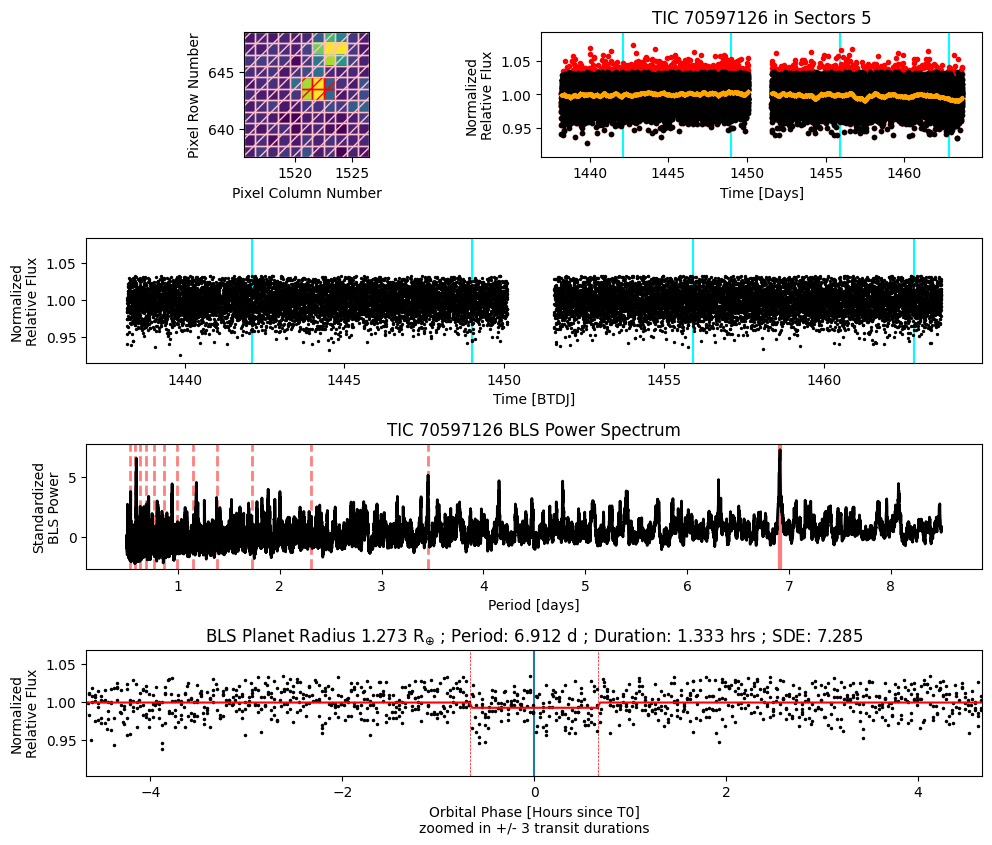

file  1 :  TIC 36724087
Number of data products for  TIC 36724087  in  TESS  with " 2 minute " cadence and in Sector " None ": 7
Our code is currently coded to handle TESS Sectors 1-26.  ['TESS Sector 35' 'TESS Sector 62'] light curves are not yet available.
 
processing 1 data products:
['TESS Sector 09']
 
window size (days):  0.46580219393492805
0
recalculated max period based on period grid and input light curve: 8.004488268689853
BLS period is  0.668583590746891 d
BLS reference time is 1544.6510797910782
BLS duration is 0.11987233714801125 d

<class 'lightkurve.lightcurve.LightCurve'>


/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/lightcurve_practice_code.py:1003: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1)
/Users/daxfeliz/opt/anaconda3/lib/python3.9/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


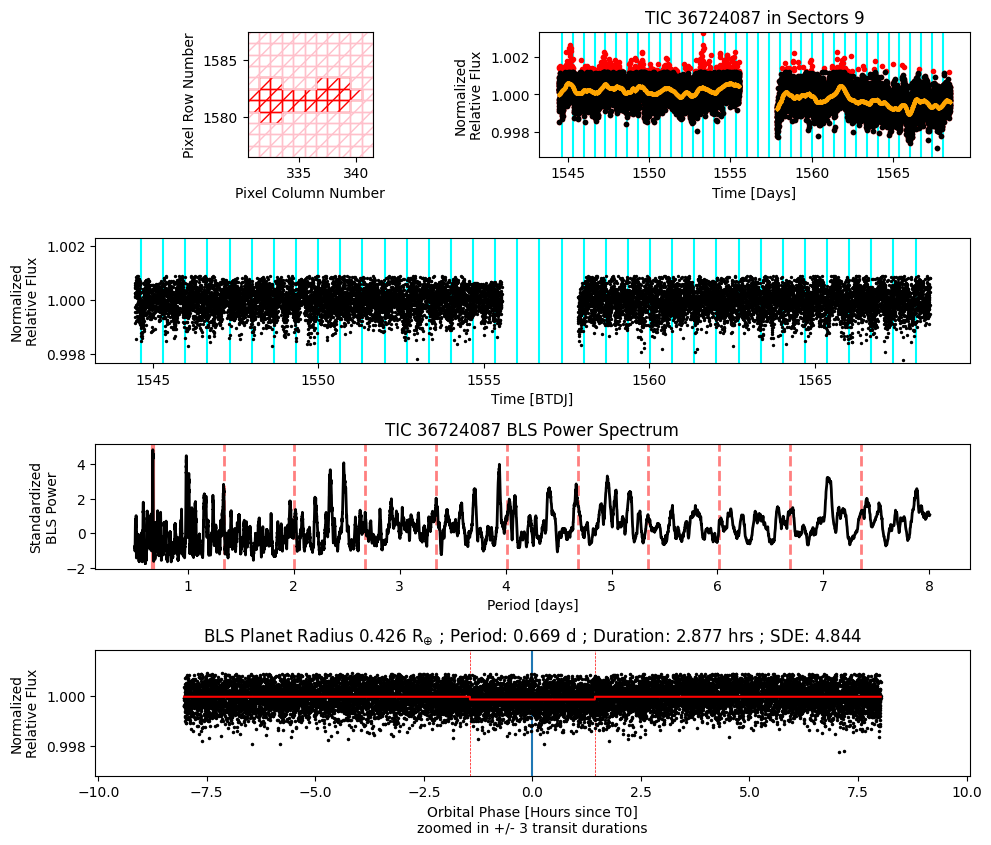

file  2 :  TIC 170636897
Number of data products for  TIC 170636897  in  TESS  with " 2 minute " cadence and in Sector " None ": 10
Our code is currently coded to handle TESS Sectors 1-26.  ['TESS Sector 31' 'TESS Sector 32'] light curves are not yet available.
 
processing 2 data products:
['TESS Sector 04' 'TESS Sector 05']
 
window size (days):  0.361386328464991
0
window size (days):  0.36202029537432184
1
recalculated max period based on period grid and input light curve: 17.583860151303785
BLS period is  0.6942583416307471 d
BLS reference time is 1410.965335720709
BLS duration is 0.11921502796852312 d

<class 'lightkurve.lightcurve.LightCurve'>


/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/lightcurve_practice_code.py:1003: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1)


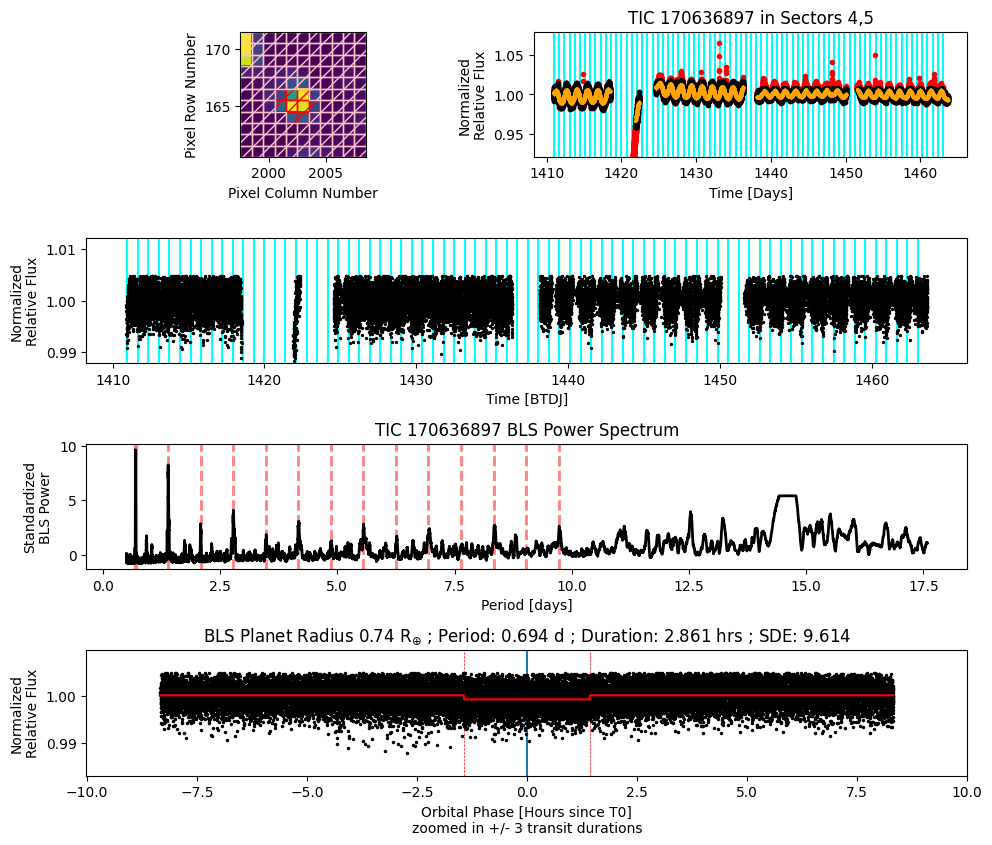

file  3 :  TIC 156646255
Number of data products for  TIC 156646255  in  TESS  with " 2 minute " cadence and in Sector " None ": 4
Our code is currently coded to handle TESS Sectors 1-26.  ['TESS Sector 50'] light curves are not yet available.
 
processing 1 data products:
['TESS Sector 23']
 
window size (days):  0.3425560356404098
0
recalculated max period based on period grid and input light curve: 8.194110346159876
BLS period is  0.7428778457362858 d
BLS reference time is 1930.5531805679727
BLS duration is 0.10246352902935423 d

<class 'lightkurve.lightcurve.LightCurve'>


/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/lightcurve_practice_code.py:1003: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1)


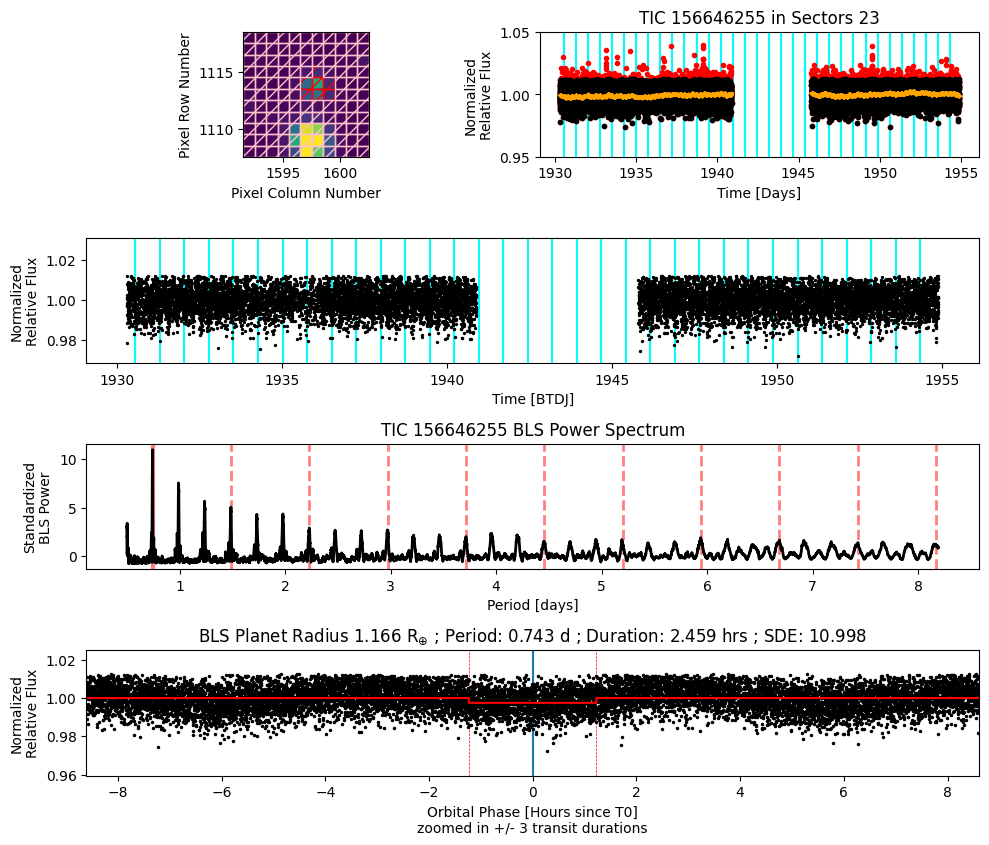

file  4 :  TIC 309153361
Number of data products for  TIC 309153361  in  TESS  with " 2 minute " cadence and in Sector " None ": 2
Our code is currently coded to handle TESS Sectors 1-26.  ['TESS Sector 38'] light curves are not yet available.
 
processing 0 data products:
[]
 
object of type 'NoneType' has no len()
No SPOC 2-minute data for file 4 : TIC 309153361



/Users/daxfeliz/opt/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:495: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(


In [11]:
for t in range(5):#len(targets)):
    target = targets.iloc[t]
    ID = target['TIC ID']
    
    starname='TIC '+str(int(ID)); Sector=None

    
    #sanity checks commented below
#     starname='TIC 261136679'; Sector=1 #'Pi Mensae'
#     starname='TIC 100100827'; Sector=2 #wasp 18b
    
    print('file ',t,': ',starname)    

    try:
        output_lc, planet_period, planet_t0, planet_dur = pipeline(starname, author, Sector, 
                                                                   mask_threshold, nsigma, save_directory,
                                                                   window_size_in_days,filter_type,
                                                                   min_period,max_period, oversampling_factor,
                                                                   duration_grid_step,verbose)
    except (TypeError,ValueError,AttributeError) as e:
        print('PROBLEM! SEE ERROR BELOW FOR FILE',t,':',starname)
        print(e)
        print('PROBLEM! SEE ERROR ABOVE FOR FILE',t,':',starname)      
        print('================')
        print('================')   
        print('')
        continue